In [1]:
#演習１決定木モデルを用いたIris（アヤメ）の品種分類
# モジュール読み込み
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.tree import export_graphviz, plot_tree
from sklearn.metrics import accuracy_score

In [2]:
# 定数定義
SEED = 2022
MAX_DEPTH = 3

In [3]:
# アヤメデータの読み込み
iris = load_iris()

iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

In [4]:
# 説明変数と目的変数にわける
x = iris.@
y = iris.@

x, y

SyntaxError: invalid syntax (<ipython-input-4-d34a36322000>, line 2)

In [ ]:
# 配列データにアクセス
x[0], y[0]

(array([5.1, 3.5, 1.4, 0.2]), 0)

In [ ]:
# 訓練用データと検証用データに分ける
X_train, X_test, Y_train, Y_test = train_test_split(x, y, random_state=@)

# 説明変数の訓練用データと検証用データを出力
X_train, X_test

(array([[5.1, 3.8, 1.9, 0.4],
        [5.2, 2.7, 3.9, 1.4],
        [6.5, 3. , 5.2, 2. ],
        [5.6, 3. , 4.5, 1.5],
        [4.9, 2.4, 3.3, 1. ],
        [7.3, 2.9, 6.3, 1.8],
        [6.9, 3.1, 5.4, 2.1],
        [6.3, 3.4, 5.6, 2.4],
        [7.1, 3. , 5.9, 2.1],
        [6.9, 3.2, 5.7, 2.3],
        [4.6, 3.1, 1.5, 0.2],
        [5.9, 3. , 5.1, 1.8],
        [6. , 2.9, 4.5, 1.5],
        [6.2, 3.4, 5.4, 2.3],
        [6.7, 3.1, 5.6, 2.4],
        [6.4, 2.8, 5.6, 2.2],
        [4.6, 3.6, 1. , 0.2],
        [7. , 3.2, 4.7, 1.4],
        [5.4, 3. , 4.5, 1.5],
        [5.1, 3.8, 1.5, 0.3],
        [6.1, 2.8, 4. , 1.3],
        [5. , 3.2, 1.2, 0.2],
        [5. , 3.5, 1.3, 0.3],
        [5.7, 2.8, 4.1, 1.3],
        [6.5, 2.8, 4.6, 1.5],
        [5. , 2. , 3.5, 1. ],
        [7.7, 3.8, 6.7, 2.2],
        [6.7, 3. , 5.2, 2.3],
        [6.7, 3.1, 4.7, 1.5],
        [6.1, 2.8, 4.7, 1.2],
        [7.2, 3.6, 6.1, 2.5],
        [5. , 3. , 1.6, 0.2],
        [5.4, 3.7, 1.5, 0.2],
        [5

In [ ]:
# 機械学習のモデルを作成（決定木）
model = DTC(max_depth =MAX_DEPTH) # モデルのインスタンス化

clf = model.fit(X_train, Y_train) # 説明・目的変数の訓練用データを学習

In [ ]:
# 検証用のデータから結果を予測
Y_pred = model.predict(@)

In [ ]:
# 実際のデータと比較
Y_test, Y_pred

(array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
        2, 0, 2, 2, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1]),
 array([2, 2, 0, 2, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2, 2, 0, 1, 2, 2, 1, 0, 0,
        2, 0, 2, 1, 2, 0, 1, 2, 0, 1, 1, 0, 1, 0, 0, 1]))

In [ ]:
# 精度を評価
accuracy_score(Y_test, Y_pred)

0.9736842105263158

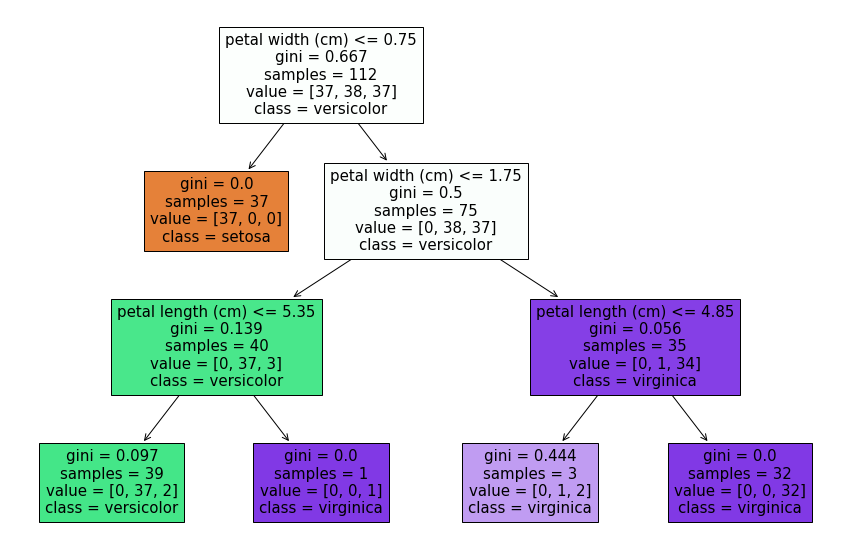

In [ ]:
# 分析結果の表示
plt.figure(figsize=(15, 10))
plot_tree(clf, feature_names=iris.feature_names, class_names=iris.target_names, filled=True)
plt.show()